## Decision Tree Prac

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DF로 로드.
featuer_name_df = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/features.txt", sep="\s+",
                              header=None, names=["column_index", "column_name"])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
featuer_name = featuer_name_df.iloc[:,1].values.tolist()
print(f"전체 피처명에서 10개만 추출 : {featuer_name[:10]}")

전체 피처명에서 10개만 추출 : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
feature_dup_df = featuer_name_df.groupby("column_name").count()
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [ ]:
feature_dup_df = featuer_name_df.groupby("column_name").count()
print(feature_dup_df[feature_dup_df["column_index"]>1].count())
feature_dup_df[feature_dup_df["column_index"]>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
# 중복 feature명에 대해서는 뒤에 번호 붙이는 함수
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("column_name").cumcount(),
                                  columns=["dup_cnt"])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how="outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name", "dup_cnt"]].apply(lambda x : x[0]+"_"+str(x[1])
                                                                                        if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(["index"], axis=1)
    return new_feature_name_df

In [ ]:
def get_human_dataset() :

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    featuer_name_df = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/features.txt", sep="\s+",
                              header=None, names=["column_index", "column_name"])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df() 를 이용, 신규 피처명 DF 생성
    new_feature_name_df = get_new_feature_name_df(featuer_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    featuer_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스스 피처 데이터를 DF로 로딩, 컬럼명은 feature_name 적용
    X_train = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt",
                          sep="\s+", names=featuer_name)
    X_test = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt",
                          sep="\s+", names=featuer_name)

    # 학습 레이블과 테스트 레이블 데이터를 DF로 로딩하고 컬럼명은 action으로 부여
    # "\s+" 데이터 사이 간격 공백으로 구분
    y_train = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt",
                          sep="\s+", header=None, names=["action"])
    y_test = pd.read_csv("./csv_data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt",
                          sep="\s+", header=None, names=["action"])

    # 로드된 학습/테스트용 DF를 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train["action"].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [ ]:
X_train.isna().sum().sum()  # Null값 확인

0

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"결정 트리 예측 정확도 : {accuracy:.4f}")

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print(f"DecisionTreeClassifier 기본 하이퍼 파라미터 : \n {dt_clf.get_params()}")

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f"GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_}")
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513444970102249
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 16}


In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[["param_max_depth", "mean_test_score"]]

# 최적 깊이 16

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [ ]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths :
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f"max_depth = {depth} 정확도 {accuracy:.4f}")

# 최고 정확도 깊이 8

max_depth = 6 정확도 0.8558
max_depth = 8 정확도 0.8707
max_depth = 10 정확도 0.8673
max_depth = 12 정확도 0.8646
max_depth = 16 정확도 0.8575
max_depth = 20 정확도 0.8548
max_depth = 24 정확도 0.8548


In [ ]:
params = {
    "max_depth" : [8, 12, 16,20],
    "min_samples_split" : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f"GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_}")
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8548794147162603
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f"결정 트리 예측 정확도 {accuracy:.4f}")

결정 트리 예측 정확도 0.8717


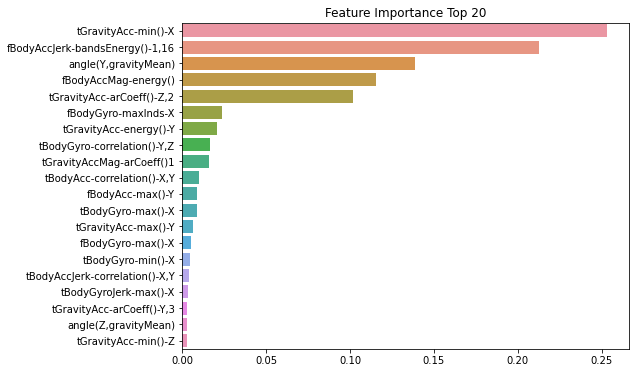

In [ ]:
import seaborn as sns

ftr_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importance = pd.Series(ftr_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title("Feature Importance Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()